<a href="https://colab.research.google.com/github/KauaHenSilva/python_img_segmentation/blob/main/adaptive_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limiar adaptativa

## Setup

In [3]:
from google.colab import drive
# Drive: https://drive.google.com/drive/folders/183rn85BNl8IXWPW80Y-ftPFnrNrGRcTI?usp=drive_link
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!cp -R "/content/drive/MyDrive/Segmentação Imagens Python AZ/imagens" "/content/imagens"

## Imports

In [4]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Implementação

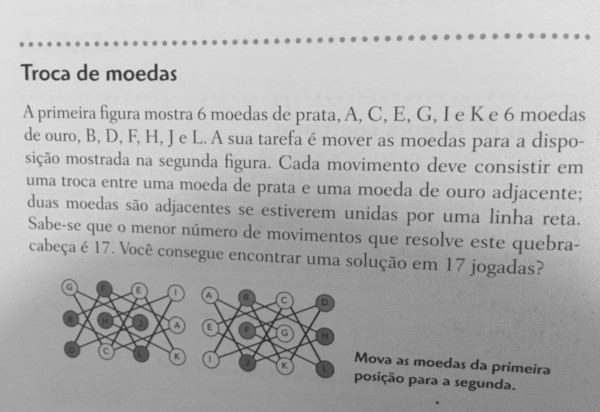

In [6]:
img = cv2.imread("/content/imagens/livro-texto.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

In [7]:
value, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
value

175.0

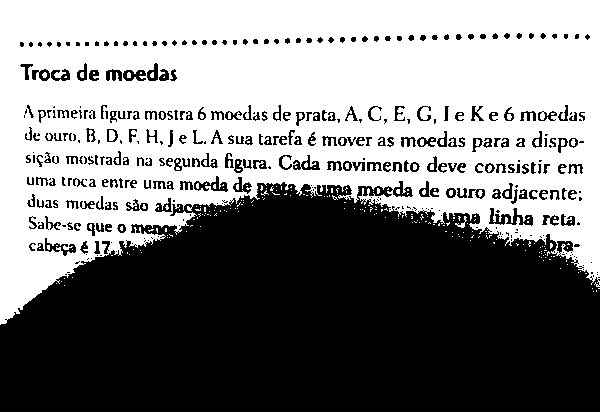

In [9]:
cv2_imshow(otsu)

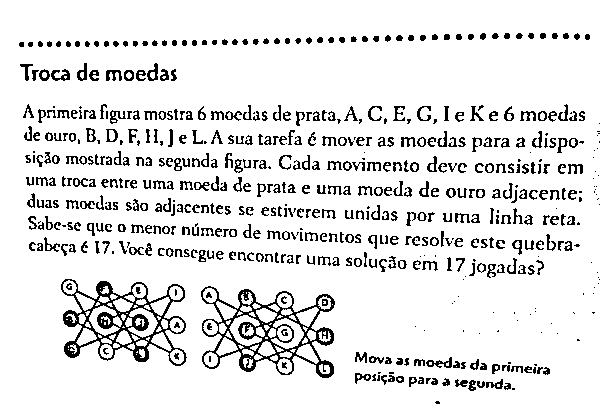

In [8]:
adapt_media = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

## Limiarização adaptativa Gaussiana

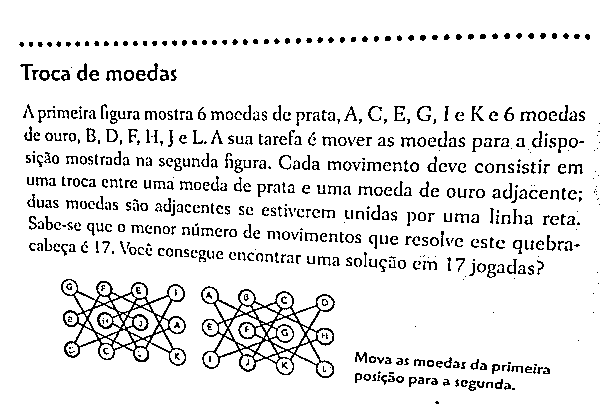

In [10]:
adapt_media = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

In [18]:
def limiarizacao_adaptativa(img, limiar = 140, block_size = 11, C = 9):
  _, limiar_global = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
  limiar_media = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
  limiar_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

  imagens = [img, limiar_global, limiar_media, limiar_gauss]
  titulos = ['Imagem original', 'Limiarização global', 'Limiarização adaptativa - média', 'Limiarização adaptativa - gaussina']

  fig = plt.gcf()
  fig.set_size_inches(18,12)

  for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imagens[i], cmap='gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])

  plt.show()

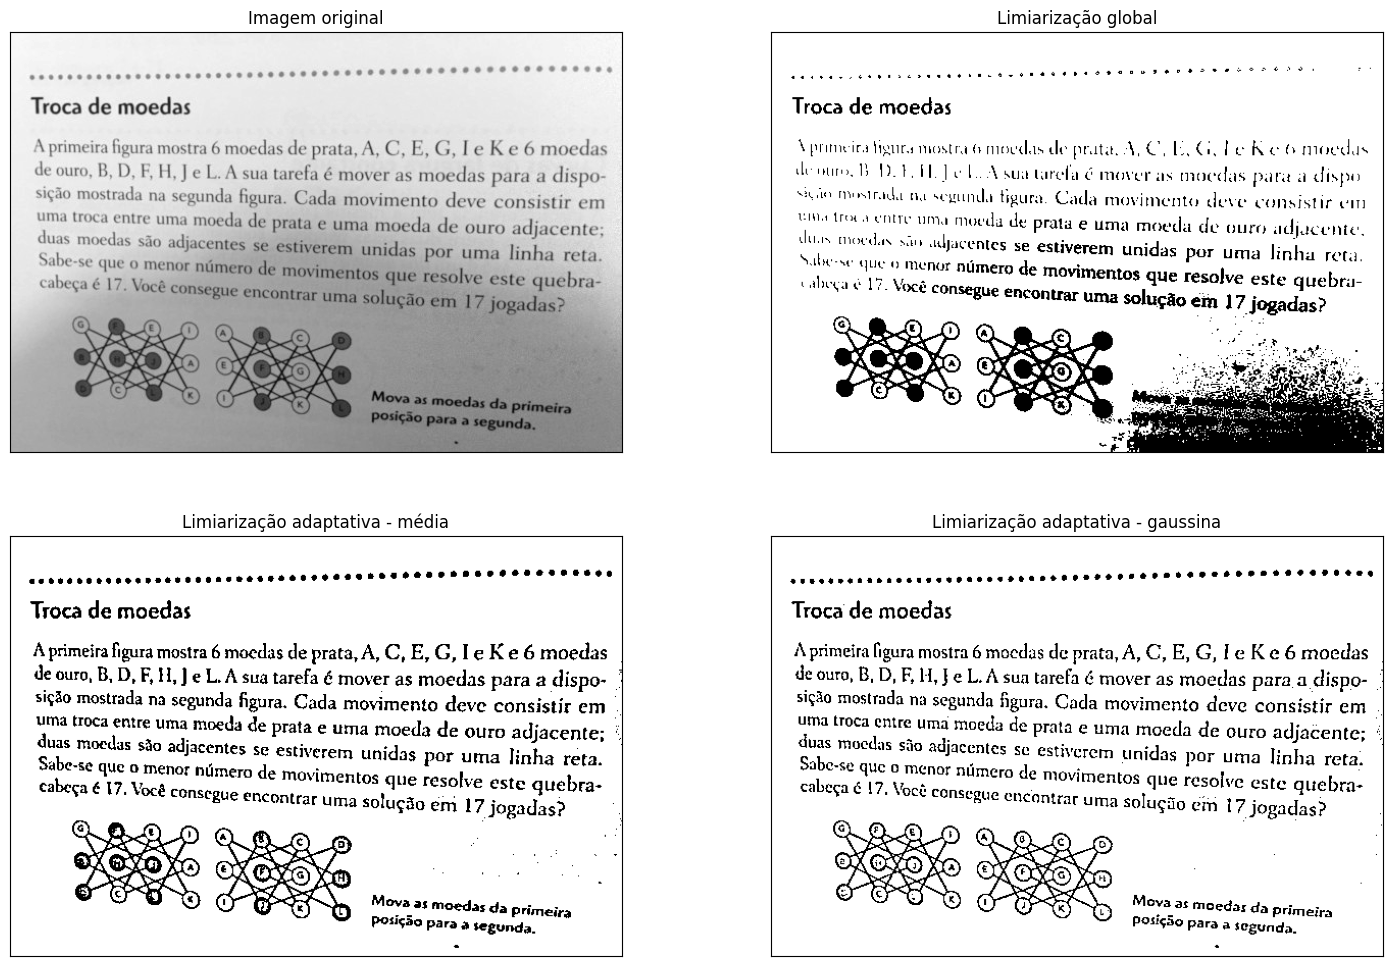

In [19]:
limiarizacao_adaptativa(img)